In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.append('/home/jr0th/github/segmentation/code/')

import skimage.io
import skimage.morphology
import skimage.segmentation

import sklearn.metrics

import os.path
import os

import numpy as np

import time

debug = True

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

In [2]:
tag = "DL_on_Hand_boundary_2"

mo_data_dir = '/home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary/' + tag + '/segm/'
mat_dir = '/home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary/' + tag + '/IoU/'
err_img_out_dir = '/home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary/' + tag + '/error_img/'

In [3]:
gt_data_dir = '/home/jr0th/github/segmentation/experiments/GT_segmentations/'
path_files_test = '/home/jr0th/github/segmentation/data/BBBC022/test.txt'

In [4]:
with open(path_files_test) as f:
    test_files = f.read().splitlines()

In [5]:
def visualize(mat, seg_gt, seg_model):

    # get number of nuclei
    nb_nuc_gt = mat.shape[0]
    nb_nuc_model = mat.shape[1]
    
    if debug:
        print('# nuclei ground truth', nb_nuc_gt)
        print('# nuclei model', nb_nuc_model)
    
    # only allow assignments if IoU is at least 0.5
    detection_map = (mat > 0.5)
    nb_matches = np.sum(detection_map)
    detection_map_gt = np.sum(detection_map, 1)
    detection_map_model = np.sum(detection_map, 0)
    
    # mask with matches
    detection_rate = mat * detection_map
    
    nb_overdetection = nb_nuc_model - nb_matches
    nb_underdetection = nb_nuc_gt - nb_matches
    
    if debug:
        print('# matches', nb_matches)
        print('# overdetections', nb_overdetection)
        print('# underdetections', nb_underdetection)
        
    mean_IoU = np.mean(np.sum(detection_rate, axis = 1))
    
    if debug:
        print('# mean IoU', mean_IoU)
    
    # plot masked matrix
    plt.figure(figsize=(10,10))
    plt.matshow(detection_rate)
    plt.show()
    
    # get indices of mislabeled cells
    error_underdetected = np.nonzero(detection_map_gt == 0)[0] + 1
    error_overdetected = np.nonzero(detection_map_model == 0)[0] + 1

    # get empty buffer image
    error_img = np.zeros((seg_model.shape[0], seg_model.shape[1], 3), dtype = np.ubyte)

    # color image
    brownish = [172, 128, 0]
    blueish = [31, 190, 214]
    for error in error_underdetected:
        # brownish: underdetected
        error_img[seg_gt == error, :] = brownish
    for error in error_overdetected:
        # blueish: overdetected
        error_img[seg_model == error, :] = error_img[seg_model == error, :] + blueish
        
    # pixels where under- and overdetection occured appear in pink
    
    return error_img

    

# nuclei ground truth 51
# nuclei model 40
# matches 40
# overdetections 0
# underdetections 11
# mean IoU 0.681833


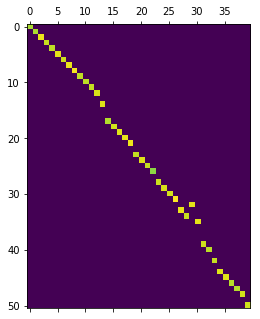

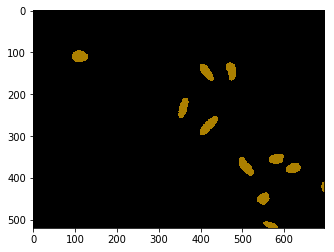

# nuclei ground truth 84
# nuclei model 56
# matches 56
# overdetections 0
# underdetections 28
# mean IoU 0.583745


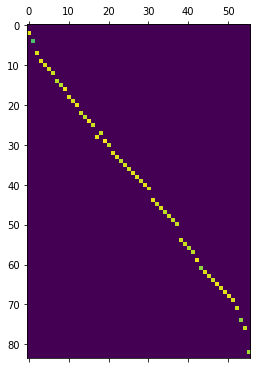

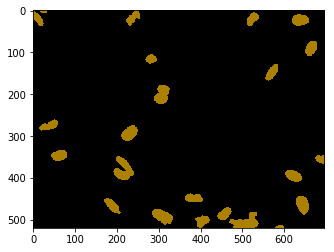

# nuclei ground truth 77
# nuclei model 36
# matches 36
# overdetections 0
# underdetections 41
# mean IoU 0.383976


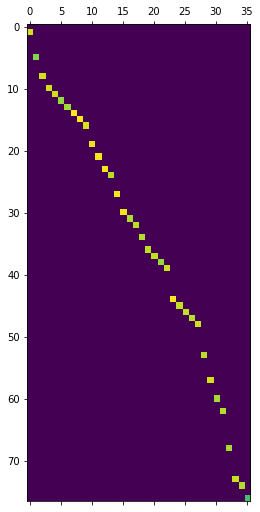

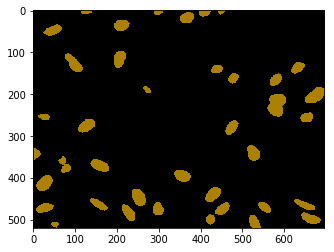

# nuclei ground truth 97
# nuclei model 43
# matches 42
# overdetections 1
# underdetections 55
# mean IoU 0.378457


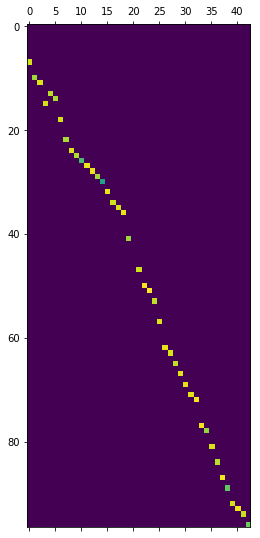

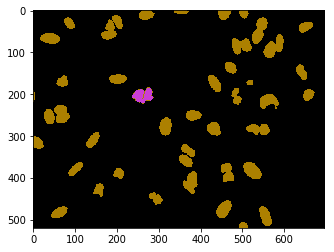

# nuclei ground truth 44
# nuclei model 35
# matches 35
# overdetections 0
# underdetections 9
# mean IoU 0.698796


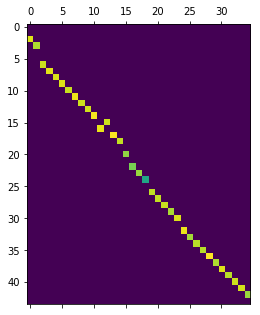

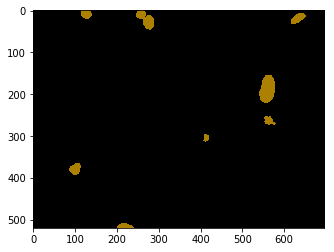

# nuclei ground truth 87
# nuclei model 59
# matches 59
# overdetections 0
# underdetections 28
# mean IoU 0.594683


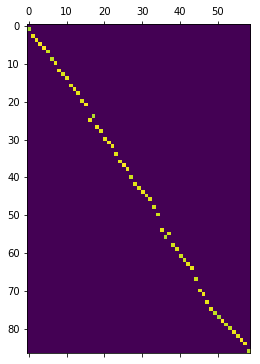

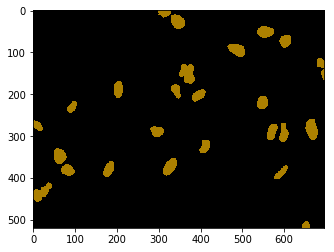

# nuclei ground truth 69
# nuclei model 52
# matches 50
# overdetections 2
# underdetections 19
# mean IoU 0.640011


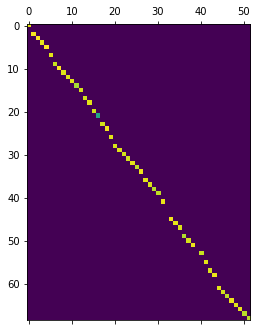

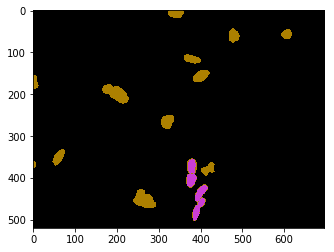

# nuclei ground truth 74
# nuclei model 49
# matches 49
# overdetections 0
# underdetections 25
# mean IoU 0.560319


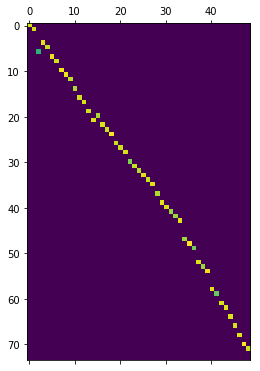

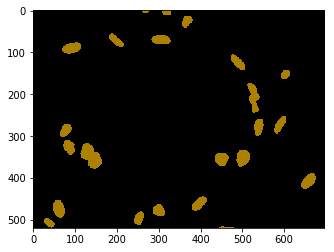

# nuclei ground truth 25
# nuclei model 15
# matches 15
# overdetections 0
# underdetections 10
# mean IoU 0.50101


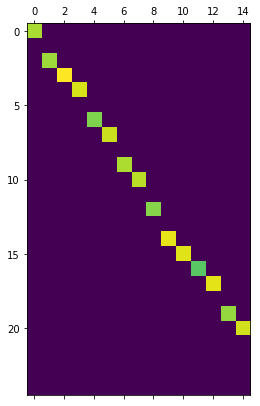

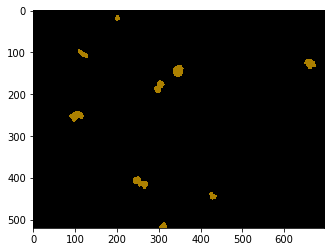

# nuclei ground truth 138
# nuclei model 85
# matches 85
# overdetections 0
# underdetections 53
# mean IoU 0.532188


/usr/local/lib/python3.6/site-packages/skimage/io/_io.py:132: UserWarning: /home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary/DL_on_Hand_boundary_2/error_img/IXMtest_N21_s1_w14F264B20-62D6-47EC-9BCD-B9416AB302D9.png is a low contrast image
  warn('%s is a low contrast image' % fname)


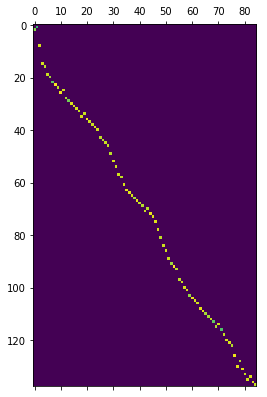

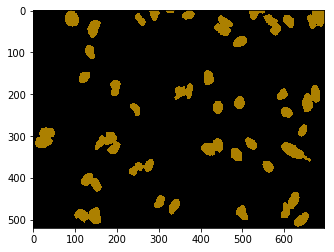

# nuclei ground truth 84
# nuclei model 49
# matches 48
# overdetections 1
# underdetections 36
# mean IoU 0.490323


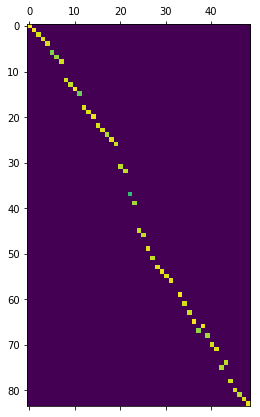

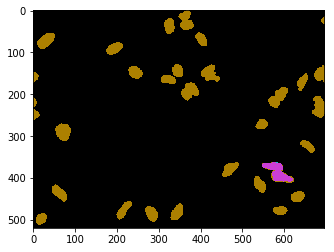

# nuclei ground truth 113
# nuclei model 64
# matches 64
# overdetections 0
# underdetections 49
# mean IoU 0.489241


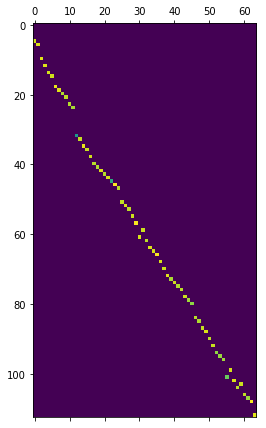

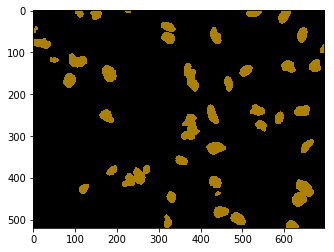

FileNotFoundError: [Errno 2] No such file or directory: '/home/jr0th/github/segmentation/experiments/DL_on_Hand_boundary/DL_on_Hand_boundary_2/IoU/IXMtest_N07_s5_w1D30ED7AB-503E-479D-B5BC-B66472568DE2.npy'

In [6]:
for filename in test_files:
    
    filename_wo_ext = os.path.splitext(filename)[0]
    
    # load error matrices
    IoU = np.load(mat_dir + filename_wo_ext + '.npy')

    # load segmentations
    seg_gt = skimage.io.imread(gt_data_dir + filename)
    seg_mo = skimage.io.imread(mo_data_dir + filename)
    
    # visualize only if matrices are full (no empty images and some detection)
    if(IoU.size != 0):
        error_img = visualize(IoU, seg_gt, seg_mo)
        plt.imshow(error_img)
        plt.show()
        skimage.io.imsave(err_img_out_dir + filename, error_img)
        